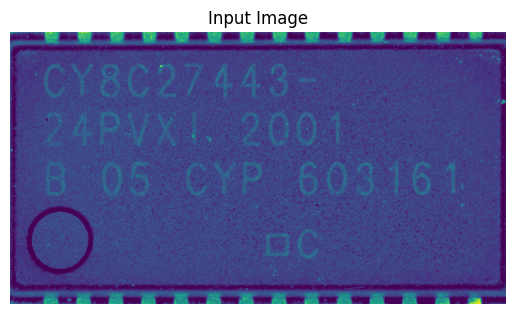

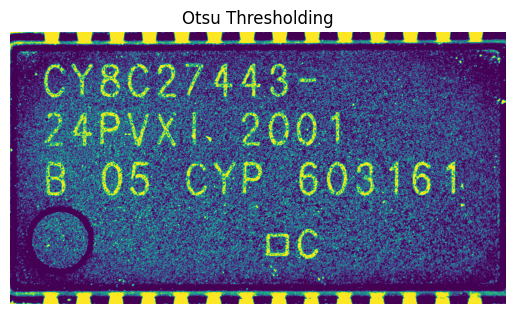

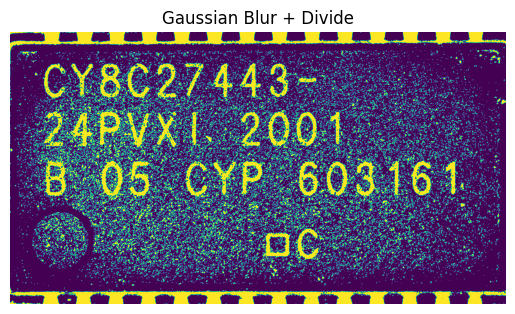

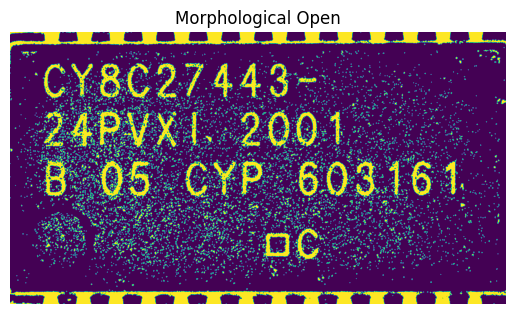

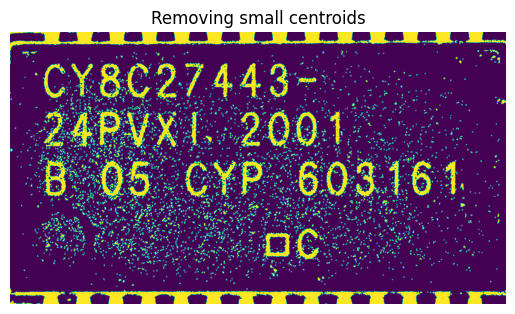

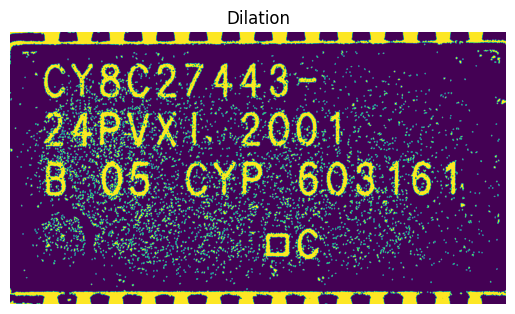

In [18]:
from PIL import Image, ImageEnhance
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = Image.open('example_image.png').convert('L')

def TextEnhancement(image, min_height):
    plt.imshow(image)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()
    image = ImageEnhance.Contrast(image).enhance(6)
    def ensure_minimum_height(image, min_height):
        """
        Ensure the image's height is at least `min_height`. Resizes if necessary.
        
        Parameters:
            image (PIL.Image): The input image.
            min_height (int): The minimum height required.
        
        Returns:
            PIL.Image: The resized (or original) image.
        """
        # Get current dimensions
        width, height = image.size
        
        # Check if height is below the minimum
        if height < min_height:
            # Calculate the new width to maintain aspect ratio
            new_width = int((min_height / height) * width)
            # Resize the image
            image = image.resize((new_width, min_height), Image.Resampling.LANCZOS)
        
        return image

    image = ensure_minimum_height(image, min_height)
    image = np.array(image)

    plt.imshow(image)
    plt.title("Otsu Thresholding")
    plt.axis('off')
    plt.show()

    _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    blur = cv2.GaussianBlur(image, ksize=(0, 0), sigmaX=33, sigmaY=33)
    image = cv2.divide(image, blur, scale=255)

    plt.imshow(image)
    plt.title("Gaussian Blur + Divide")
    plt.axis('off')
    plt.show()

    # Define a kernel for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    plt.imshow(image)
    plt.title("Morphological Open")
    plt.axis('off')
    plt.show()

    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, None, None, None, 8)
    areas = stats[1:,cv2.CC_STAT_AREA]

    results = np.zeros_like(image)
    for i in range(0, nlabels-1):
        if areas[i] >= 50:
            results[labels == i + 1] = 255

    plt.imshow(results)
    plt.title("Removing small centroids")
    plt.axis('off')
    plt.show()

    image = cv2.dilate(results, kernel=(3, 3))

    plt.imshow(image)
    plt.title("Dilation")
    plt.axis('off')
    plt.show()

    #image = cv2.GaussianBlur(image, ksize=(21, 21), sigmaX=33, sigmaY=33)
    image = Image.fromarray(image)
    return image

image = TextEnhancement(image, 1024)
